Airbnb Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_revie

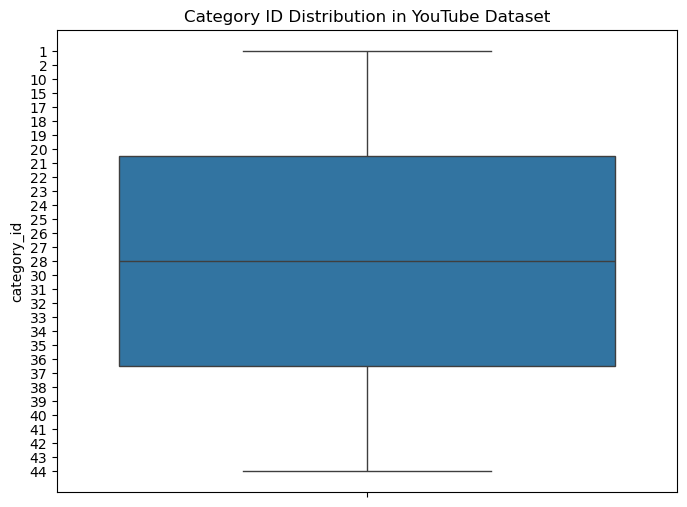


First few rows of the cleaned YouTube dataset after outlier removal and standardization:
                                kind  \
0  youtube#videoCategoryListResponse   
1  youtube#videoCategoryListResponse   
2  youtube#videoCategoryListResponse   
3  youtube#videoCategoryListResponse   
4  youtube#videoCategoryListResponse   

                                                etag  category_id  \
0  "ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...            1   
1  "ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...            2   
2  "ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...           10   
3  "ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...           15   
4  "ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...           17   

     category_title  assignable  
0  Film & Animation        True  
1  Autos & Vehicles        True  
2             Music        True  
3    Pets & Animals        True  
4            Sports        True  

Data cleaning completed. Cleaned datasets have be

In [1]:

# Idea: Cleaning Data


import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the datasets
# For Airbnb dataset (replace the path with your local dataset path)
airbnb_url = 'AB_NYC_2019.csv'
df_airbnb = pd.read_csv(airbnb_url)

# For YouTube dataset (replace the path with your local dataset path)
youtube_url = 'cleaned_youtube_data.csv'
df_youtube = pd.read_csv(youtube_url)

# Step 2: Explore the data
# Airbnb Data Overview
print("Airbnb Data Overview:")
print(df_airbnb.info())  # Check for data types and missing values
print(df_airbnb.describe())  # Summary statistics

# YouTube Data Overview
print("\nYouTube Data Overview:")
print(df_youtube.info())  # Check for data types and missing values
print(df_youtube.describe())  # Summary statistics

# Step 3: Handle Missing Data
# For Airbnb: Handle missing values
df_airbnb.isnull().sum()  # Check for missing values in Airbnb dataset
df_airbnb['price'] = df_airbnb['price'].fillna(df_airbnb['price'].median())  # Impute 'price' with median
df_airbnb['reviews_per_month'] = df_airbnb['reviews_per_month'].fillna(df_airbnb['reviews_per_month'].mean())  # Impute with mean

# Drop rows with missing essential columns like 'name', 'neighbourhood_group'
df_airbnb.dropna(subset=['name', 'neighbourhood_group'], inplace=True)

# For YouTube: Handle missing values
df_youtube.isnull().sum()  # Check for missing values in YouTube dataset

# Since 'items' is a string representation of a dictionary, convert it to actual dictionaries
df_youtube['items'] = df_youtube['items'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract relevant information from the 'items' column (which contains nested dictionaries)
df_youtube['category_id'] = df_youtube['items'].apply(lambda x: x.get('id') if isinstance(x, dict) else None)
df_youtube['category_title'] = df_youtube['items'].apply(lambda x: x.get('snippet', {}).get('title') if isinstance(x, dict) else None)
df_youtube['assignable'] = df_youtube['items'].apply(lambda x: x.get('snippet', {}).get('assignable') if isinstance(x, dict) else None)

# Drop the original 'items' column
df_youtube.drop(columns=['items'], inplace=True)

# Handle missing values in extracted columns for YouTube
df_youtube['category_title'] = df_youtube['category_title'].fillna('Unknown')  # Impute 'category_title' with 'Unknown'
df_youtube['assignable'] = df_youtube['assignable'].fillna(False)  # Impute 'assignable' with False

# Step 4: Remove Duplicates
# Check for duplicates and remove them in both datasets
df_airbnb_duplicates = df_airbnb.duplicated()
print(f"Number of duplicate rows in Airbnb dataset: {df_airbnb_duplicates.sum()}")
df_airbnb = df_airbnb.drop_duplicates()  # Remove duplicate rows

df_youtube_duplicates = df_youtube.duplicated()
print(f"Number of duplicate rows in YouTube dataset: {df_youtube_duplicates.sum()}")
df_youtube = df_youtube.drop_duplicates()  # Remove duplicate rows

# Step 5: Handle outliers and standardization
# For YouTube: Handle 'category_id' outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df_youtube['category_id'].dropna())  # Remove NA values for boxplot
plt.title("Category ID Distribution in YouTube Dataset")
plt.show()

# Convert 'category_id' to numeric (this will coerce invalid values to NaN)
df_youtube['category_id'] = pd.to_numeric(df_youtube['category_id'], errors='coerce')

# Check for any NaN values after conversion and drop them
df_youtube = df_youtube.dropna(subset=['category_id'])

# Now calculate the 95th percentile for 'category_id'
category_id_threshold_upper = df_youtube['category_id'].quantile(0.95)  # 95th percentile
df_youtube = df_youtube[df_youtube['category_id'] <= category_id_threshold_upper]  # Remove outliers above the 95th percentile

# Standardize YouTube 'category_title' to title case
df_youtube['category_title'] = df_youtube['category_title'].str.title()

# Final inspection of cleaned data
print("\nFirst few rows of the cleaned YouTube dataset after outlier removal and standardization:")
print(df_youtube.head())
print("\nData cleaning completed. Cleaned datasets have been saved.")
